In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes sadly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 20}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

from scipy.stats import mannwhitneyu


from matplotlib.colors import ListedColormap
from nheatmap import nhm, scripts

import itertools # for making comparisons
from scipy.stats import zscore # for heatmaps

# for MH correction
import statsmodels.stats.multitest as smt

from sklearn.preprocessing import StandardScaler


# for annotating volcano plots
from adjustText import adjust_text
import adjustText as at

/Users/sevahn/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
fsave_path = '../figures/manu_figs/'

def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300,
                bbox_inches = 'tight', transparent = True)

In [3]:
# colors
colors = ['#5fa8d3',  '#f4d35e', '#ee964b','#0d3b66', '#f95738', '#D90368']

biofluid_pal = {}
biofluid_pal['sediment'] = "#97D9E1"
biofluid_pal['supt'] = "#3F9ED9"
biofluid_pal['plasma'] = colors[-2]
biofluid_pal['normal'] = colors[3] #'#f4d35e' #"#0077be"
biofluid_pal['stone'] = "#34B7D3" # "#F9D71C"
biofluid_pal['bioivt'] = '#5fa8d3'

fsavepath = '../figures/'

#fig_fend = "_20230518.pdf"
#csv_fend = '_20220518.csv'

fig_fend = "_20240611.pdf"
csv_fend = '_20220611.csv'

sns.color_palette(colors)

[(0.37254901960784315, 0.6588235294117647, 0.8274509803921568),
 (0.9568627450980393, 0.8274509803921568, 0.3686274509803922),
 (0.9333333333333333, 0.5882352941176471, 0.29411764705882354),
 (0.050980392156862744, 0.23137254901960785, 0.4),
 (0.9764705882352941, 0.3411764705882353, 0.2196078431372549),
 (0.8509803921568627, 0.011764705882352941, 0.40784313725490196)]

In [4]:
plasma_fracs = pd.read_csv('../data/deconvolution_fractions/bioivt_nci_fracs_fractions__20230518.csv',
                          sep = ",", index_col = 0).T

plasma_fracs.index = [i.split("-")[0] for i in plasma_fracs.index]


In [5]:
# redid the creatinine because the normals that weren't N1/N2 were not going through
urine_fracs = pd.read_csv("../data/deconvolution_fractions/pee_repool_final_fractions__20230517.csv",
                         sep = ",", index_col = 0).T

urine_fracs.index = [i.split('-NUSVR')[0] for i in urine_fracs.index]

In [6]:
all_fracs = pd.concat([plasma_fracs, urine_fracs], axis = 0)

In [7]:
all_fracs['biofluid'] = ['sediment' if 'sediment' in i else 'supt' if 'supt' in i else 'plasma' for i in all_fracs.index]
all_fracs['is_stone'] = ['normal' if i[0] == 'N' or i[0:3] == 'SRR' else 'stone' for i in all_fracs.index ]

In [8]:
performance = all_fracs.iloc[:, -4:]
justFracs = all_fracs.iloc[:, :-4]

/Users/sevahn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sevahn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sevahn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


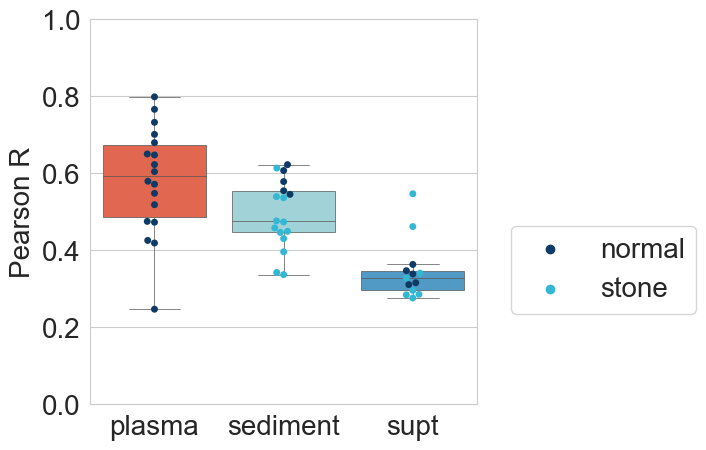

In [9]:
## DO THE R PLOT ##

plt.figure(figsize = (5, 5))

sns.boxplot(y = 'r', x = 'biofluid',
            fliersize = 0,
            palette = biofluid_pal,
            
            data = performance)

sns.swarmplot(y = 'r',
              x = 'biofluid', 
              
              color = '0.25',
              hue = 'is_stone',
              palette = biofluid_pal,
              data = performance)


plt.legend(bbox_to_anchor = (1.6, 0.5))
plt.ylabel('Pearson R');
plt.xlabel("")
plt.ylim((0, 1))
save_figure_pdf(plt, fsave_path + 'deconv_pearsonR_urinePlasma.pdf')

/Users/sevahn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sevahn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sevahn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


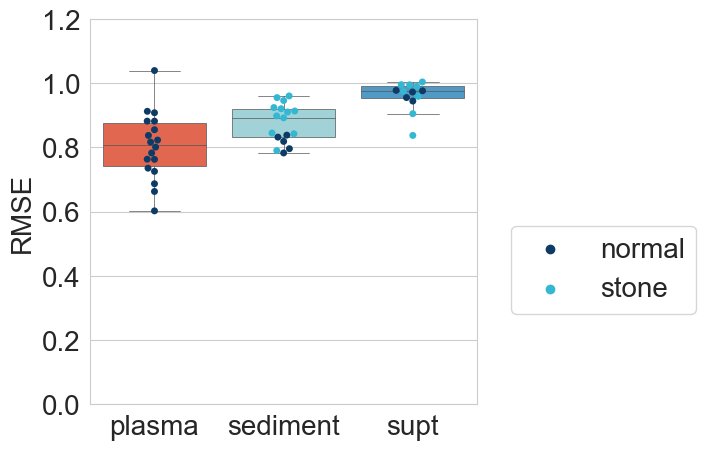

In [10]:
## DO THE RMSE PLOT ##

plt.figure(figsize = (5, 5))
sns.boxplot(y = 'rmse',
            x = 'biofluid', 
            palette = biofluid_pal,
            fliersize = 0,
            #hue = 'is_stone',
            #dodge = True,
            data = performance)

sns.swarmplot(y = 'rmse', x = 'biofluid', 
              
              color = '0.25',
              palette = biofluid_pal,
              hue = 'is_stone',
              data = performance)

plt.ylim((0, 1.2))
plt.legend(bbox_to_anchor = (1.6, 0.5))
plt.ylabel('RMSE');
plt.xlabel("")
save_figure_pdf(plt, fsave_path + '20230518_deconv_RMSE_urinePlasma.pdf')

# plot per sample deconvolved fractions

In [11]:
corrMat = justFracs.T.corr(method = "pearson")

In [12]:
dfc = pd.DataFrame(index = corrMat.index)

dfc['Biofluid'] = ['plasma' if 'SRR' in i else 'supt' if 'supt' in i else 'sediment' for i in corrMat.index]
dfc['Stone/Normal'] = ['normal' if 'SRR' in i or i[0] == 'N' else 'stone' for i in corrMat.index]

dfr = pd.DataFrame(index = corrMat.index)

In [13]:
gender_pal = {"Male" : "#1D4B65", #"#275DAD",
             "Female": "#ED1C89"} #F26CA7"}

leuk_pal = {"Negative" : "#62B6Cb",
           "Positive" : "#F7B267"}

bodyfluid_pal = {'plasma' : biofluid_pal['plasma'],
                'supt': biofluid_pal['supt'],
                'sediment': biofluid_pal['sediment']}

stone_pal = {'normal': biofluid_pal['normal'],
            'stone': biofluid_pal['stone']}

cmaps = {"Biofluid" : bodyfluid_pal,
         'Stone/Normal': stone_pal,
        "Leukocyte positive": leuk_pal,
        "Sex": gender_pal}

In [14]:
urineDipstick = pd.read_excel("../data/pee_pilot_sample_attributes.xlsx",
           sheet_name = 'urine_dipstick', index_col = 0)

leukScore = urineDipstick.loc['leu'].to_frame()
leukScore.index = [str(i) for i in leukScore.index]

In [15]:
leukDipstick = []
for i in corrMat.index:
    samp = i.split("_")[0]
    if samp in leukScore.index:
        leukDipstick += [leukScore.loc[samp].values[0]]
    else:
        leukDipstick += ['-']
        
# rename the normals
dfc['Leukocyte Dipstick'] = ["Negative" if i == '-' else "Positive" for i in leukDipstick]

In [16]:
# segregate on 

urine_meta = pd.read_csv("../data/diffex/urine_only_meta_diffex.csv",
                        sep = ",", index_col = 0)

all_meta = pd.read_csv("../data/diffex/bioivt_urine_meta_diffex.csv",
                      sep = ",", index_col = 0)

adBase = "../../deconvolution/alzheimers/remapped_unstranded/"

adMeta = pd.read_csv(adBase + "allAD_metadata_FINAL.csv",
                    index_col = 1)
meta_nci = adMeta[adMeta["Disease"] == "NCI"]

plasma_samp_id = all_meta[all_meta.sample_type == 'plasma'].index.tolist()
adMeta.Isolate = adMeta.Isolate.astype("str")

plasma_sra = [i for i in justFracs.index if "SRR" in i]
plasma_meta = adMeta.loc[plasma_sra][['Gender', 'Isolate']]
plasma_meta.reset_index(inplace = True)
plasma_meta.set_index("Isolate", inplace = True)

all_meta = all_meta.join(plasma_meta)

patient_sex = []
for i in dfc.index:
    if "SRR" in i:
        sex = all_meta[all_meta.Run == i].Gender.tolist()
        patient_sex += sex
    else:
        samp_id = i.split("_")[0]
        samp_sex = np.unique(all_meta.loc[samp_id].sex)
        
        if samp_sex == [1]:
            patient_sex += ['Male']
        else:
            patient_sex += ['Female']

dfc['Sex'] = patient_sex

In [17]:
dfc = dfc[['Biofluid', 'Stone/Normal', 'Sex', 'Leukocyte Dipstick']]

/Users/sevahn/anaconda3/lib/python3.11/site-packages/nheatmap/plot.py:345: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mapped_df = df.replace(tick_dictionary)
/Users/sevahn/anaconda3/lib/python3.11/site-packages/nheatmap/plot.py:345: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mapped_df = df.replace(tick_dictionary)
/Users/sevahn/anaconda3/lib/python3.11/site-packages/nheatmap/plot.py:345: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explici

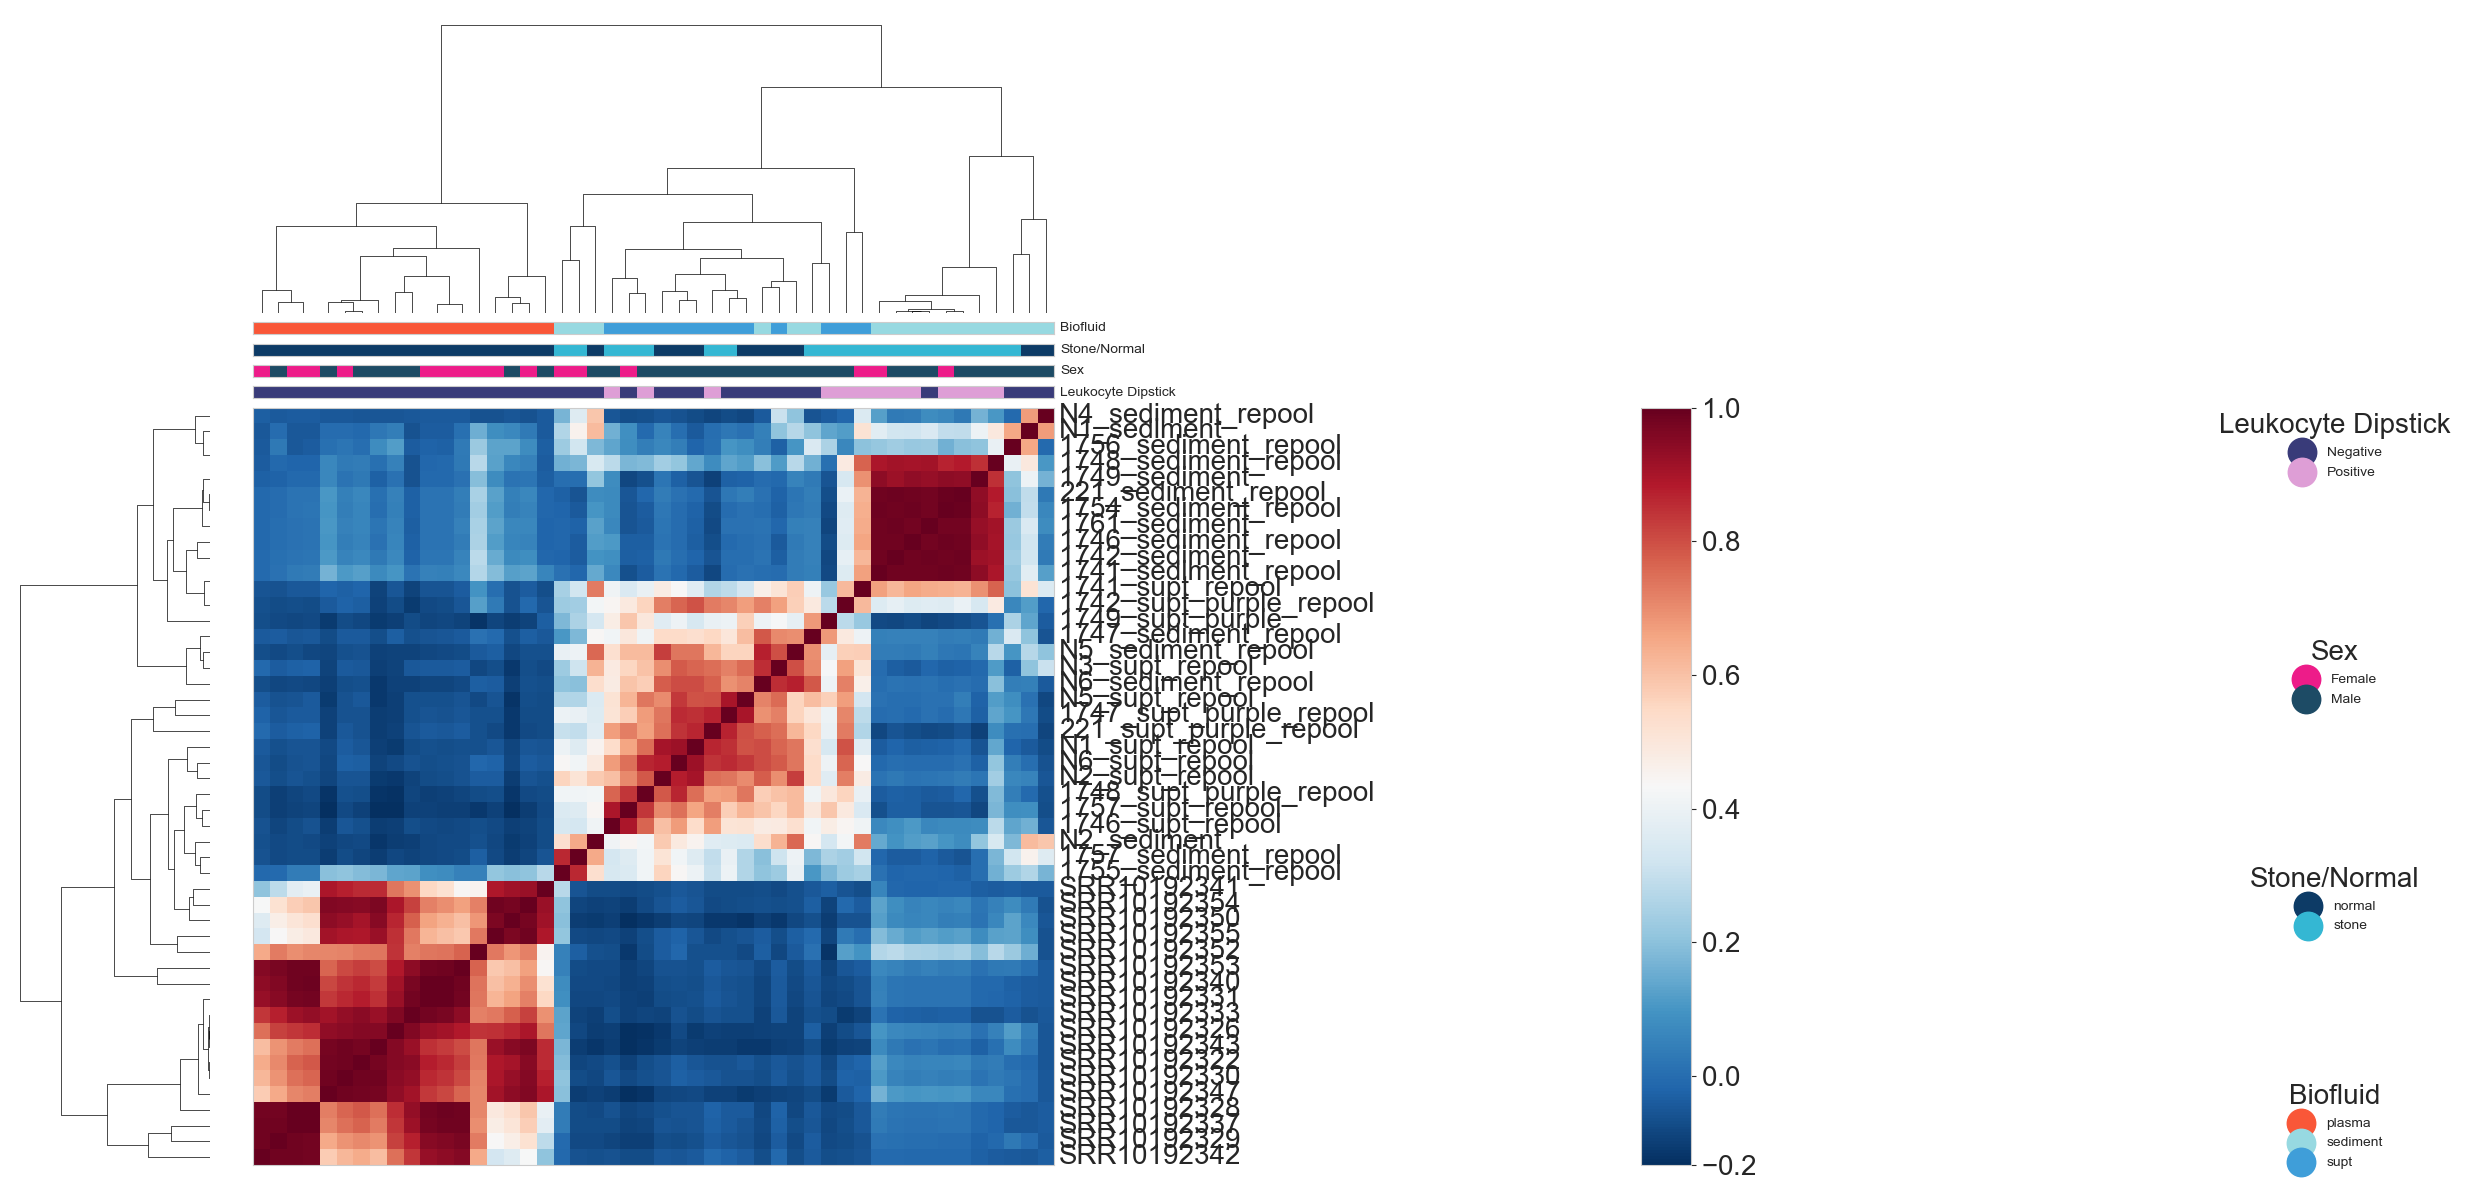

In [18]:
g = nhm(data = corrMat,
    dfr = dfr,
    dfc = dfc,
    figsize = (30, 15),
    linewidths = 0,
    cmaps = cmaps,
    cmapCenter = 'RdBu_r',
    showxticks = False)

g.hcluster(method = 'complete',
          optimal_ordering = True)

fig, plots = g.run()

#save_figure_pdf(fig, f"../figures/pairwisecorr_{fig_fend}")

In [19]:
# convert the complex labels fronm the cell type coarsegraining
# to the abbreviations, as presented in the methods

labelConversion = {}


labelConversion["gland cell"] = "acinar cell of salivary gland/myoepithelial cell"
labelConversion["respiratory ciliated cell"] = "ciliated cell/lung ciliated cell"
labelConversion["prostate epithelia"] = "club cell of prostate epithelium/hillock cell of prostate epithelium/hillock-club cell of prostate epithelium"
labelConversion["salivary/bronchial secretory cell"] = "duct epithelial cell/serous cell of epithelium of bronchus"
labelConversion["intestinal enterocyte"] = "enterocyte of epithelium of large intestine/enterocyte of epithelium of small intestine/intestinal crypt stem cell of large intestine/large intestine goblet cell/mature enterocyte/paneth cell of epithelium of large intestine/small intestine goblet cell"
labelConversion["erythrocyte/erythroid progenitor"] = "erythrocyte/erythroid progenitor"
labelConversion["fibroblast/mesenchymal stem cell"] = "fibroblast/mesenchymal stem cell"
labelConversion["intestinal secretory cell"] = "intestinal enteroendocrine cell/paneth cell of epithelium of small intestine/transit amplifying cell of small intestine"
labelConversion["ionocyte/luminal epithelial cell of mammary gland"] = "ionocyte/luminal epithelial cell of mammary gland"
labelConversion["secretory cell"] = "mucus secreting cell/secretory cell/tracheal goblet cell"
labelConversion["pancreatic alpha/beta cell"] = "pancreatic alpha cell/pancreatic beta cell"
labelConversion["respiratory secretory cell"] = "respiratory goblet cell/respiratory mucous cell/serous cell of epithelium of trachea"
labelConversion["basal prostate cell"] = "basal cell of prostate epithelia"
labelConversion["intestinal crypt stem cell"] = "immature enterocyte/intestinal crypt stem cell/intestinal crypt stem cell of small intestine/transit amplifying cell of large intestine"
    
revLabs = {}
for l in labelConversion:
    revLabs[labelConversion[l]] = l


simpleCells = []
for cell in justFracs.columns.tolist():
    if cell in list(revLabs.keys()):
        simpleCells += [revLabs[cell].capitalize()]
    else: simpleCells += [cell.capitalize()]


# shorten to the grouped names
justFracs.columns = simpleCells

justFracs = justFracs.loc[:, (justFracs != 0).any(axis = 0)]

In [20]:
allFracsZ = pd.DataFrame(zscore(justFracs.T))
allFracsZ.index = justFracs.T.index
allFracsZ.columns = justFracs.T.columns

In [21]:
allFracsZ = allFracsZ.loc[:, (allFracsZ != 0).any(axis = 0)]
print(allFracsZ.shape)

(62, 48)


In [22]:
dfc = pd.DataFrame(index = allFracsZ.index)
dfr = pd.DataFrame(index = allFracsZ.columns)

In [23]:
dfc = pd.DataFrame(index = allFracsZ.columns)

dfc['Biofluid'] = ['plasma' if 'SRR' in i else 'supt' if 'supt' in i else 'sediment' for i in allFracsZ.columns]
dfc['Stone/Normal'] = ['normal' if 'SRR' in i or i[0] == 'N' else 'stone' for i in allFracsZ.columns]


leukDipstick = []
for i in allFracsZ.columns:
    samp = i.split("_")[0]
    if samp in leukScore.index:
        leukDipstick += [leukScore.loc[samp].values[0]]
    else:
        leukDipstick += ['-']
        
# rename the normals
dfc['Leukocyte Dipstick'] = ["Negative" if i == '-' else "Positive" for i in leukDipstick]

In [24]:
patient_sex = []
for i in dfc.index:
    if "SRR" in i:
        sex = all_meta[all_meta.Run == i].Gender.tolist()
        patient_sex += sex
    else:
        samp_id = i.split("_")[0]
        samp_sex = np.unique(all_meta.loc[samp_id].sex)
        
        if samp_sex == [1]:
            patient_sex += ['Male']
        else:
            patient_sex += ['Female']

dfc['Sex'] = patient_sex

In [25]:
dfc = dfc[['Biofluid', 'Stone/Normal', 'Sex', 'Leukocyte Dipstick']]

/Users/sevahn/anaconda3/lib/python3.11/site-packages/nheatmap/plot.py:345: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mapped_df = df.replace(tick_dictionary)
/Users/sevahn/anaconda3/lib/python3.11/site-packages/nheatmap/plot.py:345: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mapped_df = df.replace(tick_dictionary)
/Users/sevahn/anaconda3/lib/python3.11/site-packages/nheatmap/plot.py:345: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explici

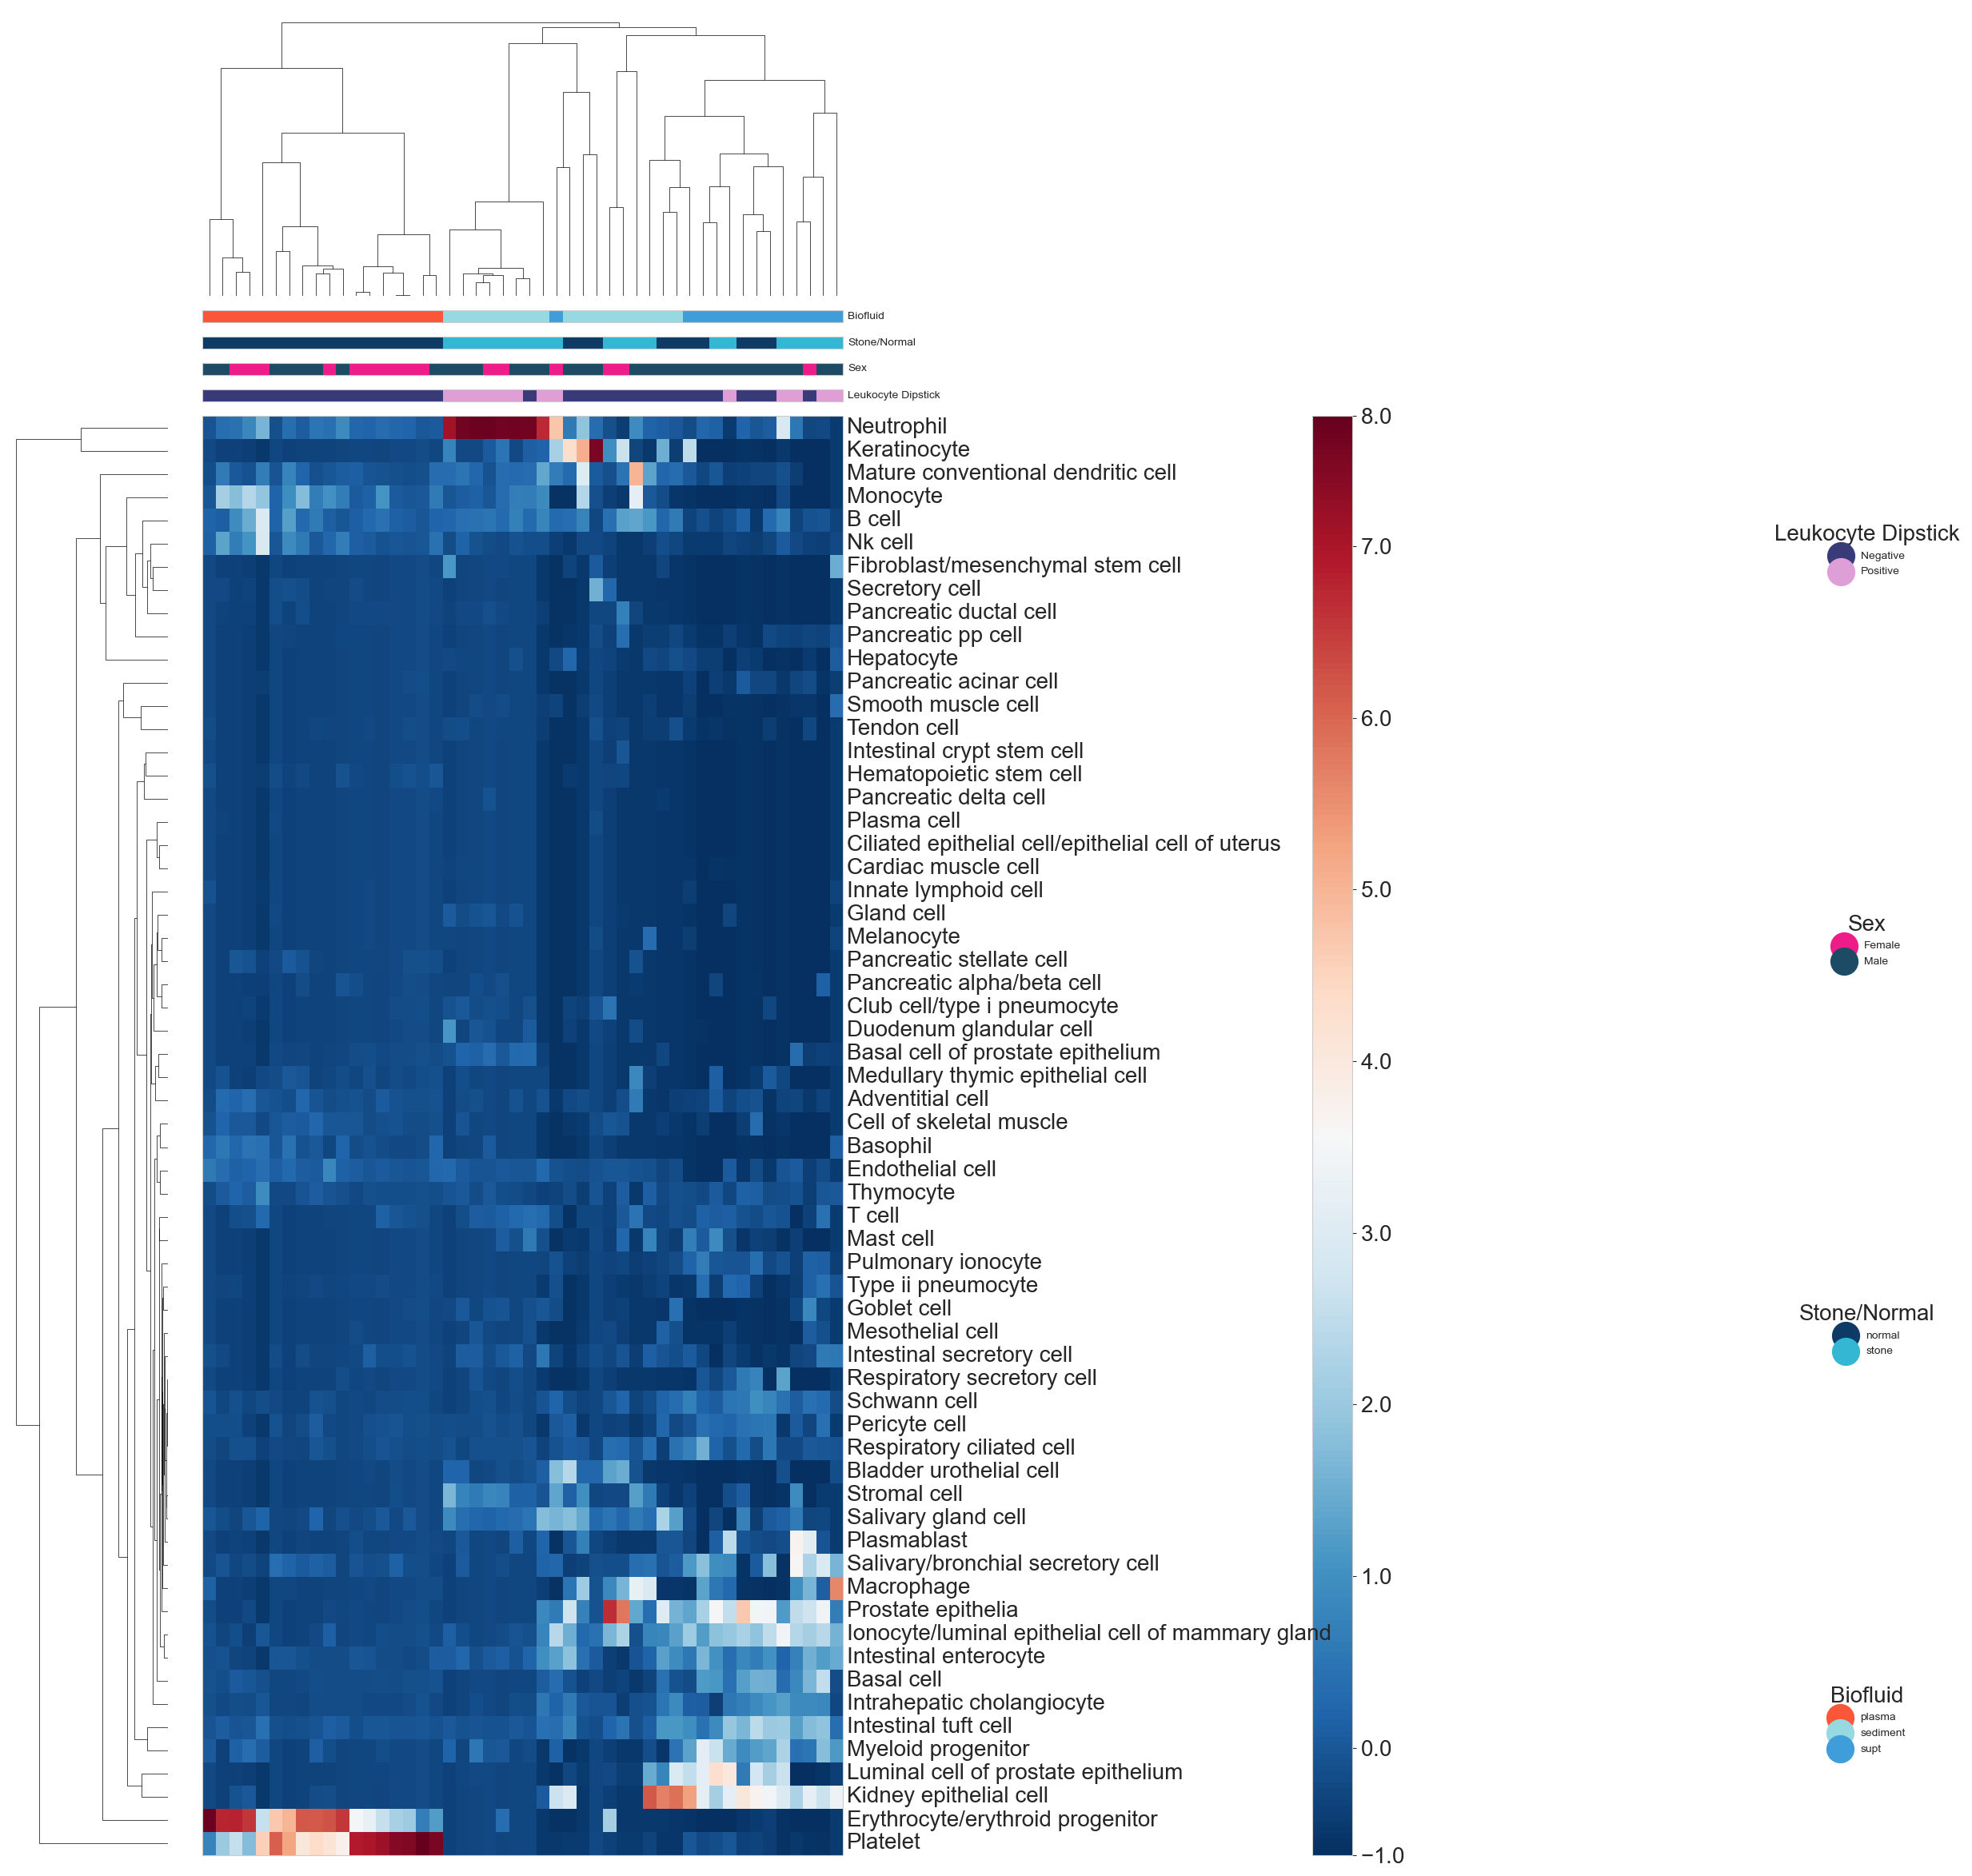

In [26]:
g = nhm(data = allFracsZ,
    dfc = dfc,
    figsize=(30, 30),
    linewidths = 0,
        #row_cluster= False,
    cmaps = cmaps,
    cmapCenter = 'RdBu_r',#'vlag',
    
    showxticks = False)

g.hcluster(method = 'complete',
          optimal_ordering = True)

fig, plots = g.run()

#save_figure_pdf(fig, f'../figures/allsampcoefs' + fig_fend)

**get the average fractional contributions per sex**

In [27]:
males = np.unique(urine_meta[urine_meta.sex == 1].index)

In [28]:
def get_avg_fracs(samp_id, sampDF, group,
                  males_only = True):
    
    if males_only == True:
        samp_list = [i for i in samp_id if i.split("_")[0] in males]
        print(f"samples: {samp_list}")
        sampDF = sampDF.loc[samp_list]
        
    else: samp_list = samp_id
        
    num_obs = len(samp_list)
    fracs_subset = sampDF.mean(axis = 0).to_frame()
    
    
    # drop cell types with fractional contrib of zero
    fracs_subset = fracs_subset[fracs_subset.any(axis = 1)]
    fracs_subset = fracs_subset.sort_values(ascending = False, by = 0)
    
    print(f"print saving mean fracs for {group}")
    fname = f"{group}_numObs{num_obs}"
    if males_only:
        fname += "_malesONLY"
    fname += ".csv"
    #fracs_subset.to_csv(fname)
    return(fracs_subset)

In [29]:
normal_cellular = [i for i in justFracs.index if i[0] == "N" and "sediment" in i]
normal_cellular = [i for i in normal_cellular if "N4" not in i]
normal_cellfree = [i for i in justFracs.index if i[0] == "N" and "supt" in i]

stone_cellular = [i for i in justFracs.index if "SRR" not in i and i[0] != "N" and "sediment" in i]
stone_cellfree = [i for i in justFracs.index if "SRR" not in i and i[0] != "N" and "supt" in i]

In [30]:
# males only for representative per-sex comparisons
mean_healthy_cellular = get_avg_fracs(normal_cellular,
                                      justFracs, "healthy_cellular",
                                      males_only = True)

mean_healthy_cellfree = get_avg_fracs(normal_cellfree,
                                      justFracs, "healthy_cellfree",
                                      males_only = True)

mean_stone_cellular = get_avg_fracs(stone_cellular,
                                    justFracs, "stone_cellular",
                                    males_only = True)

mean_stone_cellfree = get_avg_fracs(stone_cellfree,
                                    justFracs, "stone_cellfree",
                                    males_only = True)

samples: ['N1_sediment', 'N2_sediment', 'N5_sediment_repool', 'N6_sediment_repool']
print saving mean fracs for healthy_cellular
samples: ['N1_supt_repool', 'N2_supt_repool', 'N3_supt_repool', 'N5_supt_repool', 'N6_supt_repool']
print saving mean fracs for healthy_cellfree
samples: ['1742_sediment', '1747_sediment_repool', '1748_sediment_repool', '1761_sediment', '221_sediment_repool', '1746_sediment_repool', '1749_sediment', '1756_sediment_repool']
print saving mean fracs for stone_cellular
samples: ['1742_supt_purple_repool', '1747_supt_purple_repool', '1748_supt_purple_repool', '1749_supt_purple', '221_supt_purple_repool', '1746_supt_repool']
print saving mean fracs for stone_cellfree
